In [ ]:
!pip install seaborn

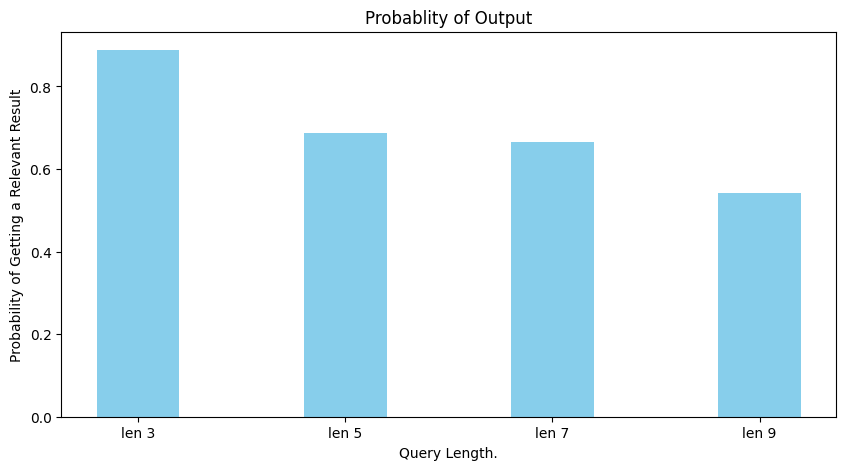

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np



# creating the dataset

data = {'len 3':0.888, 'len 5':0.688, 'len 7':0.666,

        'len 9':0.543}

courses = list(data.keys())

values = list(data.values())



fig = plt.figure(figsize = (10, 5))

# creating the bar plot

plt.bar(courses, values, color ='skyblue',

        width = 0.4)


plt.xlabel("Query Length.")

plt.ylabel("Probability of Getting a Relevant Result")

plt.title("Probablity of Output")
plt.show()

*Dataset*

In [ ]:
df=pd.read_csv('traffic_dataset.csv', encoding='unicode_escape')
print(df)

             Place        DATE   TIME Roadway_Id Intersect_Rd  road_width  \
0    Thiruvanmiyur  18-01-2023  14:25        NaN           No          24   
1         Mambalam  19-05-2023  12:05       R138          Yes          25   
2          T Nagar  02-06-2023  17:20       R152          Yes          25   
3    West Mambalam  20-05-2023  14:20       R139          Yes          26   
4         Mylapore  08-01-2023  18:00       R008           No          26   
..             ...         ...    ...        ...          ...         ...   
165    Aminjikarai  12-04-2023  12:55        NaN          Yes          38   
166   Besant Nagar  26-02-2023  14:05       R056          Yes          38   
167   Nungambakkam  26-03-2023  08:10        NaN          Yes          39   
168   Nungambakkam  29-05-2023  17:05        NaN          Yes          39   
169      Chromepet  03-02-2023  11:30       R033            Y          39   

     Latitude  Longitude  Locality School Rumble_Strips      Light Weather 

*ROWS and COLUMNS*

In [ ]:
df.describe()

,road_width,Latitude,Longitude,Traffic_Density
count,170.000000,170.000000,170.000000,170.000000
mean,31.594118,13.034358,80.226146,3.411765
std,4.377859,0.078125,0.056866,1.123120
min,24.000000,12.626900,79.703600,1.000000
25%,28.000000,13.000600,80.217000,3.000000
50%,32.000000,13.047600,80.228400,3.000000
75%,35.000000,13.083300,80.255100,4.000000
max,40.000000,13.221800,80.322600,5.000000


In [ ]:
df.head()

,Place,DATE,TIME,Roadway_Id,Intersect_Rd,road_width,Latitude,Longitude,Locality,School,Rumble_Strips,Light,Weather,dry_wet,Rd_Junction,Road_Char,Collision_Type,Traffic_Control,Traffic_Density
0,Thiruvanmiyur,18-01-2023,14:25,NaN,No,24,12.9845,80.2615,Suburban,Yes,Y,Day,Rainy,Dry,3-way,Urban,Left Turn,Yield Sign,1
1,Mambalam,19-05-2023,12:05,R138,Yes,25,13.0339,80.2223,City,Yes,Yes,Morning,Rainy,Dry,2-way,Urban,Left Turn,Traffic Light,1
2,T Nagar,02-06-2023,17:20,R152,Yes,25,13.0392,80.2376,City,Yes,Yes,Morning,Sunny,Dry,3-way,Urban,Left Turn,Traffic Light,1
3,West Mambalam,20-05-2023,14:20,R139,Yes,26,13.0376,80.2208,City,Yes,Yes,Afternoon,Foggy,Wet,3-way,Urban,Right Turn,Traffic Light,1
4,Mylapore,08-01-2023,18:00,R008,No,26,13.0339,80.2700,City,No,No,Night,Clear,Wet,2-way,Urban,Rear-end,Stop Sign,1


**DATA CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Place            170 non-null    object 
 1   DATE             170 non-null    object 
 2   TIME             170 non-null    object 
 3   Roadway_Id       90 non-null     object 
 4   Intersect_Rd     170 non-null    object 
 5   road_width       170 non-null    int64  
 6   Latitude         170 non-null    float64
 7   Longitude        170 non-null    float64
 8   Locality         170 non-null    object 
 9   School           170 non-null    object 
 10  Rumble_Strips    170 non-null    object 
 11  Light            170 non-null    object 
 12  Weather          170 non-null    object 
 13  dry_wet          170 non-null    object 
 14  Rd_Junction      170 non-null    object 
 15  Road_Char        170 non-null    object 
 16  Collision_Type   170 non-null    object 
 17  Traffic_Control 

Since there are many values missing in roadway_id....

*Drop that column*


In [ ]:
df.drop(['Roadway_Id'], axis=1 ,inplace=True)
print("Roadway_Id column removed")

Roadway_Id column removed


In [ ]:
df.shape

(170, 18)

Changing datatype

In [ ]:
# Convert 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

# Split 'TIME' into hour and minute components and create a new 'TIME' column
df['Hour'] = df['TIME'].apply(lambda x: int(x.split(':')[0]))
df['Minute'] = df['TIME'].apply(lambda x: int(x.split(':')[1]))

# Print the modified DataFrame with updated data types
print(df.dtypes)
# print(df)

Place                      object
DATE               datetime64[ns]
TIME                       object
Intersect_Rd               object
road_width                  int64
Latitude                  float64
Longitude                 float64
Locality                   object
School                     object
Rumble_Strips              object
Light                      object
Weather                    object
dry_wet                    object
Rd_Junction                object
Road_Char                  object
Collision_Type             object
Traffic_Control            object
Traffic_Density             int64
Hour                        int64
Minute                      int64
dtype: object


In [ ]:
entries=df['Intersect_Rd'].unique()
print(entries)

['No' 'Yes' 'YES' 'N' 'Y']


 "YES", 'Y', 'N' are outlier here so it should be handled.

In [ ]:
df.head()

,Place,DATE,TIME,Intersect_Rd,road_width,Latitude,Longitude,Locality,School,Rumble_Strips,Light,Weather,dry_wet,Rd_Junction,Road_Char,Collision_Type,Traffic_Control,Traffic_Density,Hour,Minute
0,Thiruvanmiyur,2023-01-18,14:25,No,24,12.9845,80.2615,Suburban,Yes,Y,Day,Rainy,Dry,3-way,Urban,Left Turn,Yield Sign,1,14,25
1,Mambalam,2023-05-19,12:05,Yes,25,13.0339,80.2223,City,Yes,Yes,Morning,Rainy,Dry,2-way,Urban,Left Turn,Traffic Light,1,12,5
2,T Nagar,2023-06-02,17:20,Yes,25,13.0392,80.2376,City,Yes,Yes,Morning,Sunny,Dry,3-way,Urban,Left Turn,Traffic Light,1,17,20
3,West Mambalam,2023-05-20,14:20,Yes,26,13.0376,80.2208,City,Yes,Yes,Afternoon,Foggy,Wet,3-way,Urban,Right Turn,Traffic Light,1,14,20
4,Mylapore,2023-01-08,18:00,No,26,13.0339,80.2700,City,No,No,Night,Clear,Wet,2-way,Urban,Rear-end,Stop Sign,1,18,0


In [ ]:
df.replace({'Yes':1,'No':0, 'Y':1, 'N':0, "YES":1},inplace=True)
df['dry_wet'] = df['dry_wet'].map({'Dry': 1, 'Wet': 0})
print(df)

             Place       DATE   TIME  Intersect_Rd  road_width  Latitude  \
0    Thiruvanmiyur 2023-01-18  14:25             0          24   12.9845   
1         Mambalam 2023-05-19  12:05             1          25   13.0339   
2          T Nagar 2023-06-02  17:20             1          25   13.0392   
3    West Mambalam 2023-05-20  14:20             1          26   13.0376   
4         Mylapore 2023-01-08  18:00             0          26   13.0339   
..             ...        ...    ...           ...         ...       ...   
165    Aminjikarai 2023-04-12  12:55             1          38   13.0721   
166   Besant Nagar 2023-02-26  14:05             1          38   13.0006   
167   Nungambakkam 2023-03-26  08:10             1          39   13.0588   
168   Nungambakkam 2023-05-29  17:05             1          39   13.0588   
169      Chromepet 2023-02-03  11:30             1          39   12.9515   

     Longitude  Locality  School  Rumble_Strips      Light Weather  dry_wet  \
0      8

**EDA - Exploratory Data Analysis**

<Axes: xlabel='Latitude', ylabel='Count'>

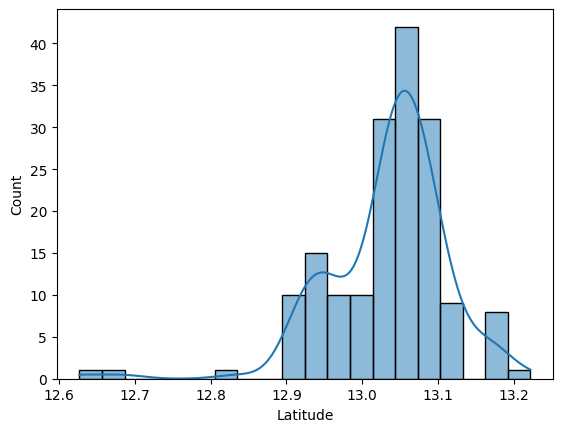

In [ ]:
sb.histplot(df['Latitude'],kde=True)

*5 point summary*

In [ ]:
summary = df.describe()
print(summary)

       Intersect_Rd  road_width    Latitude   Longitude      School  \
count    170.000000  170.000000  170.000000  170.000000  170.000000   
mean       0.670588   31.594118   13.034358   80.226146    0.594118   
std        0.471388    4.377859    0.078125    0.056866    0.492513   
min        0.000000   24.000000   12.626900   79.703600    0.000000   
25%        0.000000   28.000000   13.000600   80.217000    0.000000   
50%        1.000000   32.000000   13.047600   80.228400    1.000000   
75%        1.000000   35.000000   13.083300   80.255100    1.000000   
max        1.000000   40.000000   13.221800   80.322600    1.000000   

       Rumble_Strips     dry_wet  Traffic_Density        Hour      Minute  
count     170.000000  170.000000       170.000000  170.000000  170.000000  
mean        0.676471    0.670588         3.411765   12.494118   28.764706  
std         0.469205    0.471388         1.123120    3.048420   16.397537  
min         0.000000    0.000000         1.000000    7.0

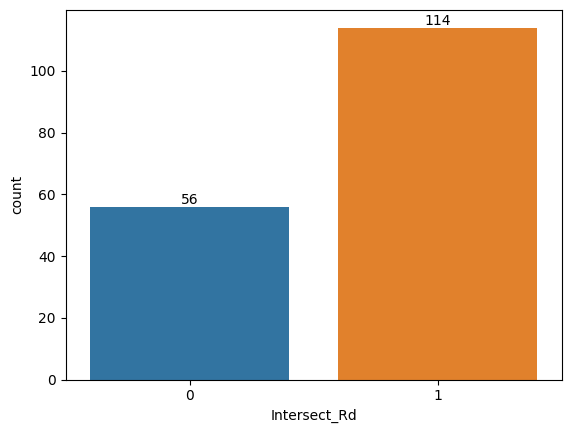

In [ ]:
pl = sb.countplot(data= df, x= 'Intersect_Rd')

for bars in pl.containers:
  pl.bar_label(bars)

It is infered that most of the traffic occurs in the Intersection roads.

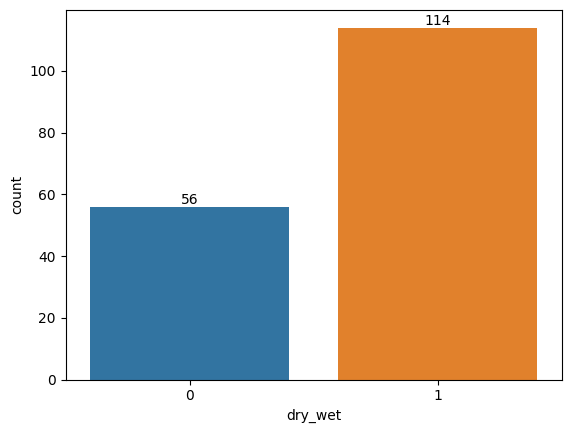

In [ ]:
pl =sb.countplot(data= df, x= 'dry_wet')

for bars in pl.containers:
  pl.bar_label(bars)

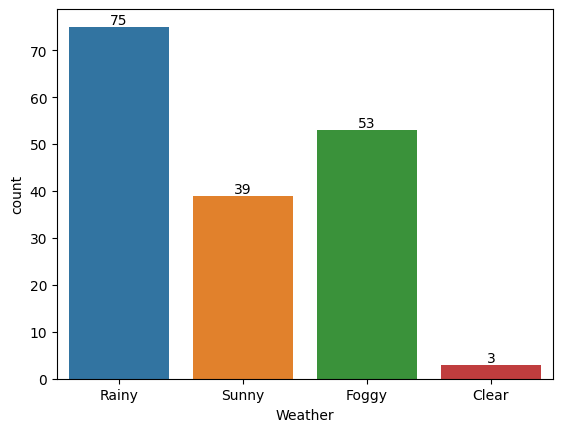

In [ ]:
pl =sb.countplot(data= df, x= 'Weather')

for bars in pl.containers:
  pl.bar_label(bars)

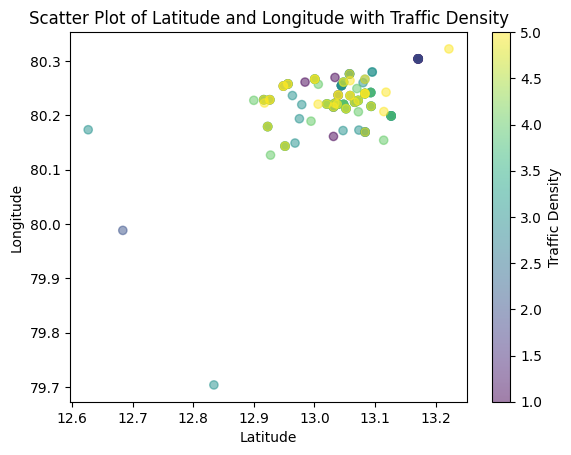

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Latitude' and 'Longitude' are two features for the scatter plot
plt.scatter(df['Latitude'], df['Longitude'], c=df['Traffic_Density'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Traffic Density')  # Add colorbar for density
plt.title('Scatter Plot of Latitude and Longitude with Traffic Density')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()



<Axes: xlabel='Longitude', ylabel='Count'>

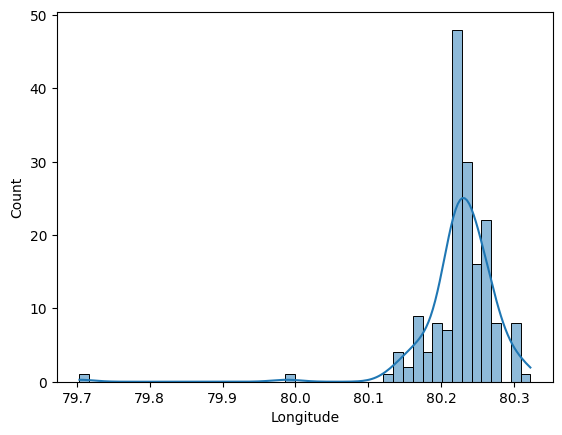

In [ ]:
sb.histplot(df['Longitude'],kde=True)

Road width

In [ ]:
r=df['road_width'].describe()
print(r)

count    170.000000
mean      31.594118
std        4.377859
min       24.000000
25%       28.000000
50%       32.000000
75%       35.000000
max       40.000000
Name: road_width, dtype: float64


<Axes: xlabel='road_width', ylabel='Density'>

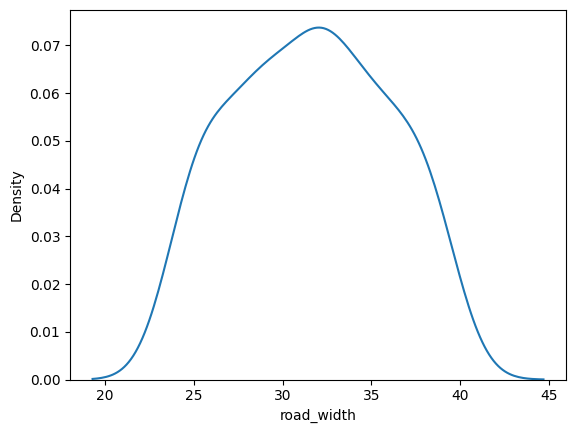

In [ ]:
sb.kdeplot(df['road_width'])

To find the skewness
*  Positive value: Positively skewed -> Right skewed

In [ ]:
print(df['road_width'].skew())

0.009299822790121828


Correlation

In [ ]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Intersect_Rd,road_width,Latitude,Longitude,School,Rumble_Strips,dry_wet,Traffic_Density,Hour,Minute
Intersect_Rd,1.000000,0.422269,0.224792,-0.052226,-0.095051,-0.003147,0.094612,0.145953,-0.079594,0.073355
road_width,0.422269,1.000000,0.164640,0.057339,-0.098812,-0.211219,0.075326,0.188233,-0.013703,0.084057
Latitude,0.224792,0.164640,1.000000,0.443896,0.039048,-0.003712,-0.163235,-0.103015,0.186764,-0.093258
Longitude,-0.052226,0.057339,0.443896,1.000000,0.274591,0.131808,0.033178,-0.047894,0.067578,-0.145845
School,-0.095051,-0.098812,0.039048,0.274591,1.000000,0.529432,0.006896,-0.038384,0.067370,-0.077104
Rumble_Strips,-0.003147,-0.211219,-0.003712,0.131808,0.529432,1.000000,-0.003147,-0.003963,0.021415,-0.063789
dry_wet,0.094612,0.075326,-0.163235,0.033178,0.006896,-0.003147,1.000000,0.056540,-0.343130,0.004458
Traffic_Density,0.145953,0.188233,-0.103015,-0.047894,-0.038384,-0.003963,0.056540,1.000000,-0.061506,0.182006
Hour,-0.079594,-0.013703,0.186764,0.067578,0.067370,0.021415,-0.343130,-0.061506,1.000000,-0.117929
Minute,0.073355,0.084057,-0.093258,-0.145845,-0.077104,-0.063789,0.004458,0.182006,-0.117929,1.000000


<ipython-input-30-a4d6a5eb07b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


<Axes: >

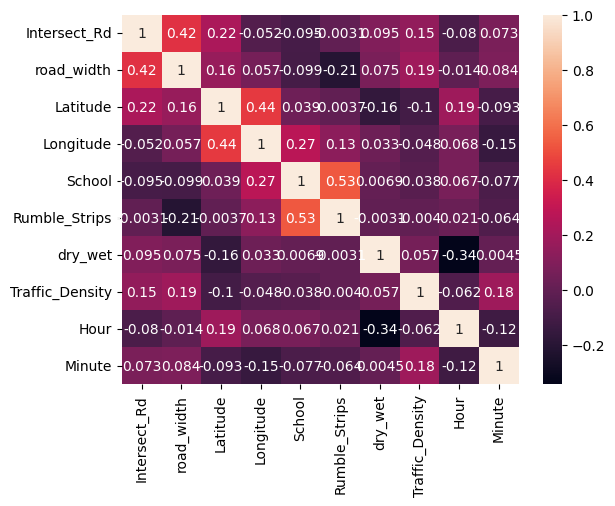

In [ ]:
sb.heatmap(df.corr(), annot=True)

From this we can find that Presence of school is highly correlated with Rumble_strips

**Frequency distribution**

In [ ]:
df.Place.value_counts()

Kilpauk           7
Besant Nagar      6
Neelankarai       6
Kottivakkam       6
Anna Nagar        5
Kodambakkam       5
Nolambur          5
Mogappair         5
Villivakkam       5
Triplicane        5
Mambalam          5
Aminjikarai       5
Korattur          5
Vadapalani        5
Pallikaranai      5
T Nagar           5
Teynampet         5
Choolaimedu       5
Ashok Nagar       5
West Mambalam     5
Perambur          5
Madipakkam        4
Nungambakkam      4
Anna Salai        4
Saidapet          4
Thiruvottiyur     4
Chromepet         4
Thoraipakkam      4
Purasawalkam      4
Vepery            2
Sowcarpet         2
Chetpet           1
Sholinganallur    1
Adyar             1
Kotturpuram       1
Ambattur          1
Tambaram          1
Ennore            1
Medavakkam        1
Royapettah        1
Koyambedu         1
Alandur           1
Thiruvanmiyur     1
Virugambakkam     1
Egmore            1
Nanganallur       1
Mahabalipuram     1
Perungudi         1
Kanchipuram       1
Velachery         1


From this we can infer that Kilpauk is having more traffic areas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Place            170 non-null    object        
 1   DATE             170 non-null    datetime64[ns]
 2   TIME             170 non-null    object        
 3   Intersect_Rd     170 non-null    int64         
 4   road_width       170 non-null    int64         
 5   Latitude         170 non-null    float64       
 6   Longitude        170 non-null    float64       
 7   Locality         170 non-null    object        
 8   School           170 non-null    int64         
 9   Rumble_Strips    170 non-null    int64         
 10  Light            170 non-null    object        
 11  Weather          170 non-null    object        
 12  dry_wet          170 non-null    int64         
 13  Rd_Junction      170 non-null    object        
 14  Road_Char        170 non-null    object   

In [ ]:
df.Road_Char.value_counts()

Urban       159
Rural         9
Suburban      2
Name: Road_Char, dtype: int64

Urban Areas are suffering from lot of traffic

In [ ]:
df.Rd_Junction.value_counts()

2-way    59
3-way    57
4-way    54
Name: Rd_Junction, dtype: int64

In [ ]:
rel = pd.crosstab(index=df['Weather'],columns=df['Road_Char'])
rel

Road_Char,Rural,Suburban,Urban
Weather,,,
Clear,0,1,2
Foggy,4,0,49
Rainy,3,1,71
Sunny,2,0,37


Urban roads during rainy season is getting more traffic and Clear weather has the least traffic

**Central Tendencies**

In [ ]:
mean_value = df.mean()
print(mean_value)

Intersect_Rd        0.670588
road_width         31.594118
Latitude           13.034358
Longitude          80.226146
School              0.594118
Rumble_Strips       0.676471
dry_wet             0.670588
Traffic_Density     3.411765
Hour               12.494118
Minute             28.764706
dtype: float64


<ipython-input-36-37e09929f551>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_value = df.mean()
<ipython-input-36-37e09929f551>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = df.mean()


In [ ]:
median_value = df.median()
print(median_value)

Intersect_Rd        1.0000
road_width         32.0000
Latitude           13.0476
Longitude          80.2284
School              1.0000
Rumble_Strips       1.0000
dry_wet             1.0000
Traffic_Density     3.0000
Hour               12.0000
Minute             30.0000
dtype: float64


<ipython-input-37-2587cccd5325>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median_value = df.median()
<ipython-input-37-2587cccd5325>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_value = df.median()


In [ ]:
mode_value = df.mode().iloc[0]
print(mode_value)

Place                          Kilpauk
DATE               2023-01-01 00:00:00
TIME                             12:40
Intersect_Rd                       1.0
road_width                        32.0
Latitude                       13.0833
Longitude                      80.2404
Locality                          City
School                             1.0
Rumble_Strips                      1.0
Light                          Morning
Weather                          Rainy
dry_wet                            1.0
Rd_Junction                      2-way
Road_Char                        Urban
Collision_Type                Rear-end
Traffic_Control          Traffic Light
Traffic_Density                    3.0
Hour                               9.0
Minute                            20.0
Name: 0, dtype: object


In [ ]:
std_deviation = df.std()
print(std_deviation)

DATE               49 days 11:19:57.806524709
Intersect_Rd                         0.471388
road_width                           4.377859
Latitude                             0.078125
Longitude                            0.056866
School                               0.492513
Rumble_Strips                        0.469205
dry_wet                              0.471388
Traffic_Density                       1.12312
Hour                                  3.04842
Minute                              16.397537
dtype: object


<ipython-input-39-63a8bc0d0ce9>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_deviation = df.std()


In [ ]:
mean_value = df['Traffic_Density'].mean()
median_value = df['Traffic_Density'].median()
mode_value = df['Traffic_Density'].mode()[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: 3.411764705882353
Median: 3.0
Mode: 3


Discuss the implications of central tendency and variability measures on your model.


Mean:

Implication: The mean represents the average value of the dataset. It can be sensitive to outliers and extreme values.
Impact on Model: Outliers can significantly affect the mean, influencing the model's understanding of the average behavior. Models using the mean might be skewed by outliers.

Median:

Implication: The median is the middle value when data is sorted. It's less sensitive to outliers.
Impact on Model: Using the median can provide a more robust measure of central tendency, especially when the dataset contains outliers. Models based on the median are more robust against extreme values.

Mode:

Implication: The mode represents the most frequent value(s) in the dataset.
Impact on Model: In some cases, identifying the mode can help in imputation or handling missing values. Models might consider the most frequent value as the representative value.

Standard Deviation:

Implication: Standard deviation measures the spread or dispersion of the data around the mean. Higher standard deviation implies more variability.
Impact on Model: Models need to consider the variability to understand the spread of data points around the mean. Higher variability might indicate more uncertainty in predictions.

To find whether **Normally distributed**.

In [ ]:
from scipy.stats import shapiro  # Shapiro-Wilk test
from scipy.stats import probplot  # Q-Q plot
from scipy.stats import normaltest

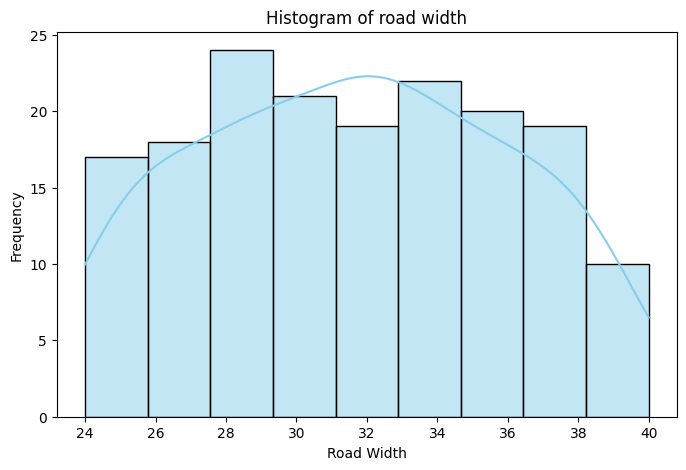

In [ ]:
plt.figure(figsize=(8, 5))
sb.histplot(df['road_width'], kde=True, color='skyblue')
plt.title('Histogram of road width')
plt.xlabel('Road Width')
plt.ylabel('Frequency')
plt.show()

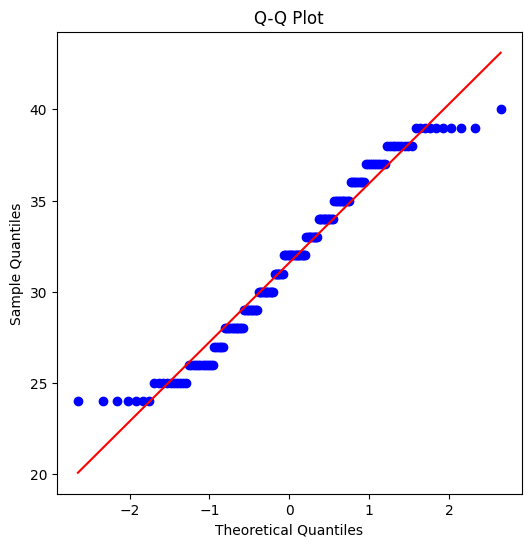

In [ ]:
plt.figure(figsize=(6, 6))
probplot(df['road_width'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [ ]:
shapiro_test_stat, shapiro_p_value = shapiro(df['road_width'])
print(f"Shapiro-Wilk Test - Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")

# D'Agostino and Pearson's test for normality
k2_stat, k2_p_value = normaltest(df['road_width'])
print(f"D'Agostino and Pearson's Test - Test Statistic: {k2_stat}, p-value: {k2_p_value}")


Shapiro-Wilk Test - Test Statistic: 0.9617128372192383, p-value: 0.00012872526713181287
D'Agostino and Pearson's Test - Test Statistic: 34.63321152253822, p-value: 3.016432925201922e-08


In [ ]:
from scipy.stats import boxcox


In [ ]:
transformed_data, lambda_value = boxcox(df['road_width'])

# Replace the original column with the transformed data in the DataFrame
df['transformed_road_width'] = transformed_data

# Display the lambda value determined by the transformation
print(f"Lambda value for Box-Cox transformation: {lambda_value}")

Lambda value for Box-Cox transformation: 0.7647265963295188


In [ ]:
# Apply Box-Cox transformation to 'road_width' column using the lambda value
transformed_data = boxcox(df['road_width'], lmbda=0.4449452757228693)

# Assign the transformed data back to the DataFrame
df['transformed_road_width'] = transformed_data

# Plot histogram and Q-Q plot to visualize the transformation
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0, 0.5, 'Frequency')

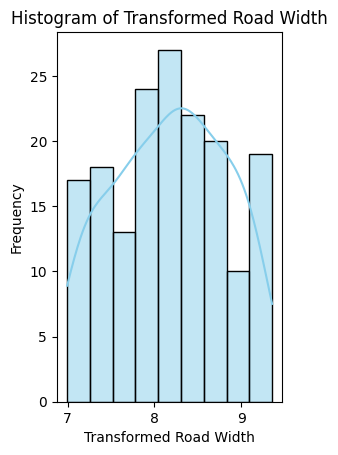

In [ ]:
plt.subplot(1, 2, 1)
sb.histplot(transformed_data, kde=True, color='skyblue')
plt.title('Histogram of Transformed Road Width')
plt.xlabel('Transformed Road Width')
plt.ylabel('Frequency')

In [ ]:
shapiro_test_stat, shapiro_p_value = shapiro(df['transformed_road_width'])
print(f"Shapiro-Wilk Test - Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")

# D'Agostino and Pearson's test for normality
k2_stat, k2_p_value = normaltest(df['transformed_road_width'])
print(f"D'Agostino and Pearson's Test - Test Statistic: {k2_stat}, p-value: {k2_p_value}")

Shapiro-Wilk Test - Test Statistic: 0.9609277844429016, p-value: 0.00010735456453403458
D'Agostino and Pearson's Test - Test Statistic: 32.99643967989073, p-value: 6.837764864300142e-08


**Correlation between dependent and independent attributes**

In [ ]:
independent_variables = df[['road_width', 'School', 'Rumble_Strips', 'Weather']]

dependent_variable = df['Traffic_Density']

correlation_coefficients = independent_variables.corrwith(dependent_variable)

print("Correlation Coefficients:")
print(correlation_coefficients)


Correlation Coefficients:
road_width       0.188233
School          -0.038384
Rumble_Strips   -0.003963
dtype: float64


<ipython-input-50-16dd5546adeb>:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coefficients = independent_variables.corrwith(dependent_variable)


The positive correlation coefficient (0.188233) between 'Road_Width' and 'Traffic_Density' suggests a weak positive linear relationship.

As 'Road_Width' increases, there might be a slight tendency for 'Traffic_Density' to increase. However, the correlation is not strong, indicating other factors likely influence traffic density more significantly.

Negative Correlation indicates an extremely weak correlation.

**Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[['road_width']]
y = df['Traffic_Density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set (if split)
y_pred = model.predict(X_test)

# Evaluate the model (if split)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred)**2)

Mean Squared Error: 1.0308862285645024
R-squared: 0.00037721947434912685


<h1>Testing</h1>

<h3>for single variable z test</h3>

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

print("H0:There is no significant difference between sample mean and given mean.")
print("H1:There is significant difference between samples. ")

group1=df['road_width']
print("-----------------")
print("Width of Road:")
print(group1.describe())
print('-----------------')
z_stat1,p_value1=ztest(group1,value=100)

z_alpha=0.05
if p_value1<z_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the sample mean and given mean.")

H0:There is no significant difference between sample mean and given mean.
H1:There is significant difference between samples. 
-----------------
Width of Road:
count    170.000000
mean      31.594118
std        4.377859
min       24.000000
25%       28.000000
50%       32.000000
75%       35.000000
max       40.000000
Name: road_width, dtype: float64
-----------------
Reject the null hypothesis: There is a significant difference between the means.


<h3>for 2 variable z test</h3>

In [ ]:
print("H0:There is no significant difference between means.")
print("H1:There is significant difference between means. ")
# Convert categorical variables to numerical values
df['Traffic_Density_numeric'] = df['Traffic_Density'].astype('category').cat.codes
df['TIME_numeric'] = df['TIME'].astype('category').cat.codes

# Perform Z-test on the numerical versions
z_stat, p_value = ztest(df['Traffic_Density_numeric'], df['TIME_numeric'])
# group1=df['Traffic_Density']
# group2=df['TIME']
# z_stat,p_value=ztest(group1,group2)

z_alpha=0.05

if p_value<z_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the means.")

H0:There is no significant difference between means.
H1:There is significant difference between means. 
Reject the null hypothesis: There is a significant difference between the means.


for single variable t test

In [ ]:
from scipy import stats
t_stat,pt_value=stats.ttest_1samp(df['dry_wet'],10)

t_alpha=0.05
if pt_value<t_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the means.")

Reject the null hypothesis: There is a significant difference between the means.


for 2 variable t test

In [ ]:
print("2 sample t-test to compare the traffic density with the condition of the dry_wet condtions of the road .")

t_stat,pt1_value=stats.ttest_ind(df['Traffic_Density'],df['dry_wet'])
t_alpha=0.05
print(pt1_value)
if pt_value<t_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the means.")

2 sample t-test to compare the traffic density with the condition of the dry_wet condtions of the road .
5.955320195122439e-95
Reject the null hypothesis: There is a significant difference between the means.


In [ ]:
print("2 sample t-test to compare the traffic density with the presence of intersection.")

t_stat,pt1_value=stats.ttest_ind(df['Traffic_Density'],df['Intersect_Rd'])
t_alpha=0.05
print(pt1_value)
if pt_value<t_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the means.")

2 sample t-test to compare the traffic density with the presence of intersection.
5.955320195122439e-95
Reject the null hypothesis: There is a significant difference between the means.


<h3>ANNOVA test</h3>

In [ ]:
from scipy.stats import f_oneway

# Assuming 'CategoryVariable' is your categorical variable with more than two levels
categories = df['Place'].unique()

# Create a list to store numerical data for each category
groups = [df[df['Place'] == category]['Traffic_Density'] for category in categories]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f_stat,p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between at least two group means.")
else:
    print("Accept the null hypothesis: There is no significant difference between group means.")


Accept the null hypothesis: There is no significant difference between group means.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming 'Traffic_Density', 'Place', 'dry_wet', and 'road_width' are the actual column names in your DataFrame
formula = 'Traffic_Density ~ C(Place) + C(dry_wet) + C(Intersect_Rd) + C(Place):C(dry_wet) + C(Place):C(Intersect_Rd) + C(dry_wet):C(Intersect_Rd)'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model)

print("Two-Way ANOVA Results:")
print(anova_table)

# Extracting p-values for each factor and interaction
p_values = {}
for factor in anova_table.index[:-1]:
    p_values[factor] = anova_table['PR(>F)'][factor]

# Setting significance level
alpha = 0.05

# Interpret the results for each factor and interaction
for factor, p_value in p_values.items():
    if p_value < alpha:
        print(f"Reject the null hypothesis for {factor}: There is a significant difference between the means.")
    else:
        print(f"Fail to reject the null hypothesis for {factor}: There is no significant difference between the means.")


Two-Way ANOVA Results:
                              df      sum_sq   mean_sq         F    PR(>F)
C(Place)                    54.0   81.102661  1.501901  1.241241  0.177794
C(dry_wet)                   1.0    0.008021  0.008021  0.006629  0.935282
C(Intersect_Rd)              1.0    2.679549  2.679549  2.214503  0.140031
C(Place):C(dry_wet)         54.0   66.474660  1.231012  1.017365  0.462796
C(Place):C(Intersect_Rd)    54.0   60.950629  1.128715  0.932823  0.604277
C(dry_wet):C(Intersect_Rd)   1.0    0.097032  0.097032  0.080191  0.777654
Residual                    95.0  114.950000  1.210000       NaN       NaN
Fail to reject the null hypothesis for C(Place): There is no significant difference between the means.
Fail to reject the null hypothesis for C(dry_wet): There is no significant difference between the means.
Fail to reject the null hypothesis for C(Intersect_Rd): There is no significant difference between the means.
Fail to reject the null hypothesis for C(Place):C(dry_wet):

Model for prediction

RandomForestClassifier model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Add this import statement
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

Model 1:Linear Regression.

In [ ]:
df.fillna('Yes', inplace=True)



# Convert 'Yes' to 1 and 'No' to 0 for categorical columns
categorical_columns = ['Intersect_Rd','School']

for column in categorical_columns:
    df[column] = df[column].map({'Yes': 1,'No':0})

# Define features (X) and target variable (y)
features = ['Intersect_Rd', 'road_width', 'Latitude', 'Longitude', 'School']

X = df[features]
y = df['Traffic_Density']  # Assuming 'Traffic_Density' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the testing data
predictions = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print results
print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# Validate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared Scores: {cv_scores}')

print("Thus the Traffic density is predicted using Intersect_Rd,road_width,Latitude,Longitude,School")


Mean Squared Error: 1.002607614401695, R-squared: 0.00854199978754544
Cross-Validation R-squared Scores: [-4.07851978 -2.24963963 -4.29563667 -1.33885395  0.        ]
Thus the Traffic density is predicted using Intersect_Rd,road_width,Latitude,Longitude,School


In [ ]:
# Load your dataset (replace 'your_data.csv' with your actual file)
# df = pd.read_csv('your_data.csv')

# Define features (X) and target variable (y)
features = ['Intersect_Rd', 'road_width', 'Latitude', 'Longitude',
            'School','dry_wet']

X = df[features]
y = df['Traffic_Density']  # Assuming 'Traffic_Density' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the testing data
predictions = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Print results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Validate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')

Accuracy: 0.5294117647058824
Confusion Matrix:
[[ 1  0  0  0  0]
 [ 0  1  0  1  1]
 [ 0  0 12  0  5]
 [ 1  0  1  2  2]
 [ 1  0  4  0  2]]
Classification Report:
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.33      0.50         3
           3       0.71      0.71      0.71        17
           4       0.67      0.33      0.44         6
           5       0.20      0.29      0.24         7

    accuracy                           0.53        34
   macro avg       0.58      0.53      0.48        34
weighted avg       0.61      0.53      0.54        34

Cross-Validation Accuracy Scores: [0.23529412 0.14705882 0.29411765 0.35294118 0.47058824]
